In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
import pandas as pd 

In [5]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

results=[]
for story in ['black','slumlordreach']:
    results_story=[]
    if story=='black':
        subs=black_subs
    if story=='slumlordreach':
        subs=slumlordreach_subs
    result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding_headwise/"
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
    for sub in subs:
        if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
            results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            results_sub=np.zeros((20,144))
            for roi in range(20):
                results_sub[roi]=(results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)/noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean())
                results_sub[roi]=results_sub[roi]*100.0
            #results_story.append(-1*np.log(results_sub/noise_sub))
            results_story.append(results_sub)
    results_story=np.asarray(results_story)
    results.append(results_story)
results=np.concatenate(results,axis=0)
results[np.isnan(results)]=0.0

def get_result_dataset(dataset,rep_name,normalize_isc=True):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        if 'full' in rep_name:
            result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding_"+rep_name+"/"
        elif 'layer' not in rep_name and 'ling' not in rep_name and 'glove' not in rep_name:
            result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+story+"_"+rep_name+"/"
        else:
            result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
        for sub in subs:
            if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
                results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
                noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
                results_sub=np.zeros((22,))
                noise_sub=np.zeros((22,))
                for roi in range(22):
                    results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
                    noise_sub[roi]=noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean()
                #results_story.append(-1*np.log(results_sub/noise_sub))
                if normalize_isc:
                    r=(results_sub/noise_sub)*100.0
                    r[r>100]=100.0
                    results_story.append((results_sub/noise_sub)*100.0)
                else:
                    results_story.append((results_sub))
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 


In [4]:
z_performance=get_result_dataset(['black','slumlordreach'],'full_z')
z_performance.shape

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(63, 22)

In [3]:
for i in [1,2,3,4,5]:
    print(len(set(highest_heads[:,:i].flatten())))
np.sum(np.isnan(results))

NameError: name 'highest_heads' is not defined

In [6]:
mean_subjects=np.mean(results,axis=0)
highest_heads=np.argsort(mean_subjects,axis=1)[:,::-1]
brain_heads=[]
brain_head_labels=[]
for head in set(highest_heads[:,:1].flatten()):
    print(head,head//12+1,head-(head//12)*12+1)
    brain_heads.append(head)
    brain_head_labels.append(str(head//12+1)+"-"+str(head-(head//12)*12+1))
bert_heads=[]
bert_head_labels=[]
for head in set([(7,6),(7,4),(9,6),(8,11),(4,10),(8,2),(4,10),(8,10),(7,6),(4,10),(7,6),(4,10),(8,1),(8,2),(6,7)]):
    bert_head_labels.append(str(head[0])+"-"+str(head[1]))
    bert_heads.append(12*(head[0]-1)+(head[1]-1))


65 6 6
131 11 12
8 1 9
73 7 2
74 7 3
107 9 12
13 2 2
82 7 11
22 2 11


In [7]:
results=[]
noise_ceilings=[]
for story in ['black','slumlordreach']:
    results_story=[]
    if story=='black':
        subs=black_subs
    if story=='slumlordreach':
        subs=slumlordreach_subs
    result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding_headwise/"
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI.npy')
    for sub in subs:
        if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
            results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            #results_sub=np.zeros((20,144))
            #for roi in range(20):
            #    results_sub[roi]=(results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)/noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean())
            #    results_sub[roi]=results_sub[roi]*100.0
            #results_story.append(-1*np.log(results_sub/noise_sub))
            noise_ceilings.append(noise_ceiling_parcels)
            results_story.append(results_sub_parcels)
    results_story=np.asarray(results_story)
    results.append(results_story)
results=np.concatenate(results,axis=0)
noise_ceilings=np.asarray(noise_ceilings).mean(axis=0)

results[np.isnan(results)]=0.0


In [8]:
for sub in range(63):
    for head in range(144):
        results[sub,:,head]=(results[sub,:,head]/noise_ceilings)*100.0
results[np.isnan(results)]=0.0
     

In [7]:
np.sum(np.isnan(results))

0

In [9]:
whole_brain_pvalues=np.zeros((1000,144))

def bootstrap_pvalue(data):
	shifted=data-np.mean(data)
	sampling=[]
	for _ in range(1000):
		m1=np.mean(np.random.choice(shifted[:42],replace=True,size=42))
		m2=np.mean(np.random.choice(shifted[42:],replace=True,size=17))
		sampling.append(np.mean([m1,m2]))
	sampling=np.asarray(sampling)
	p=np.sum(sampling>=np.mean(data))/len(sampling)
	#print(p)
	return p
def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig] 

for p in range(1000):
	print(p)
	for head in brain_heads+bert_heads:
		whole_brain_pvalues[p,head]=bootstrap_pvalue(results[:,p,head])
	whole_brain_pvalues[:,head]=p_adjust_bh(whole_brain_pvalues[:,head])

0
1
2
3


KeyboardInterrupt: 

In [8]:
#np.save('/jukebox/griffiths/bert-brains/code/bert-brains/data/headwise_whole_brain_pvalues.npy',whole_brain_pvalues)
whole_brain_pvalues=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/headwise_whole_brain_pvalues.npy')

In [9]:
parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')
whole_brain_pvalues.shape,results.shape

((1000, 144), (63, 1000, 144))

In [11]:
for i,head in enumerate(brain_heads):
    print(head)
    p_values=whole_brain_pvalues[:,head]
    parcel_results=np.mean(results[:,:,head],axis=0)
    volume=np.zeros(parcellation.shape)
    for p in range(1000):
        if p_values[p]<0.05:
            volume[np.where(parcellation==p+1)]=parcel_results[p]
    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),vmax=25,output_file='/jukebox/griffiths/bert-brains/code/bert-brains/plots/fig5/glass_brain_'+brain_head_labels[i]+".svg")

65
131
8
73
74
107
13
82
22


In [10]:
for i,head in enumerate(bert_heads):
    print(head)
    p_values=whole_brain_pvalues[:,head]
    parcel_results=np.mean(results[:,:,head],axis=0)
    volume=np.zeros(parcellation.shape)
    for p in range(1000):
        if p_values[p]<0.05:
            volume[np.where(parcellation==p+1)]=parcel_results[p]
    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),vmax=25,output_file='/jukebox/griffiths/bert-brains/code/bert-brains/plots/fig5/glass_bert_'+bert_head_labels[i]+".svg")

45
66
85
84
94
77
93
75
101


In [12]:
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
 'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-296', 'sub-127', 'sub-279', 
 'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']

results=[]
for story in ['black','slumlordreach']:
    results_story=[]
    if story=='black':
        subs=black_subs
    if story=='slumlordreach':
        subs=slumlordreach_subs
    result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding_headwise/"
    roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
    for sub in subs:
        if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
            results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            results_sub=np.zeros((22,144))
            for roi in range(22):
                r=(results_sub_parcels[np.where(roi_mapping==roi+1)].mean(axis=0)/noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean())*100.0
                r[r>100]=100.0
                results_sub[roi]=r
            #results_story.append(-1*np.log(results_sub/noise_sub))
            results_story.append(results_sub)
    results_story=np.asarray(results_story)
    results.append(results_story)
results=np.concatenate(results,axis=0)
results[np.isnan(results)]=0.0



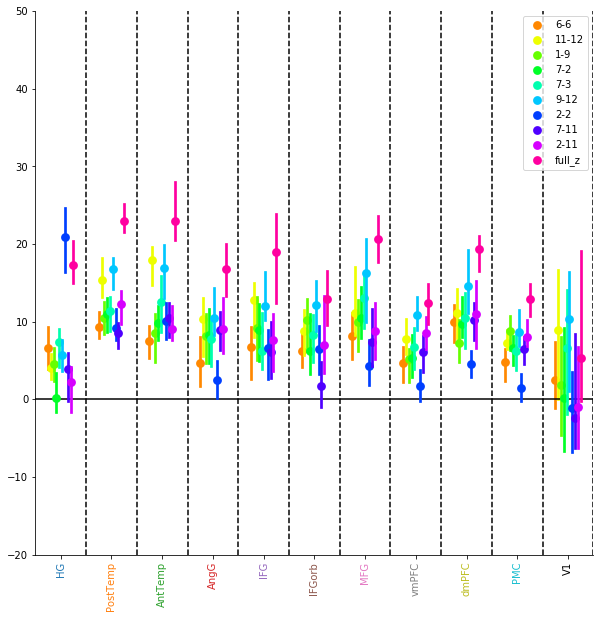

In [16]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']

roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
reps=[]
for head in brain_heads:
    reps.append(results[:,:,head])
reps.append(z_performance)
#for head in bert_heads:
#    reps.append(results[:,:,head])
#rep_names=brain_head_labels+bert_head_labels
rep_names=brain_head_labels+['full_z']
roi=[]
performance=[]
rep_name=[]
for k in range(len(rep_names)):
    example_layer=reps[k]
    for i in range(example_layer.shape[0]):
        for j in range(20):
            roi.append(rois[j%11])
            rep_name.append(rep_names[k])
            r=example_layer[i,j]
            if r<-800:
                r=0
            performance.append(r)
roi=np.asarray(roi)
performance=np.asarray(performance)
rep_name=np.asarray(rep_name)
df=pd.DataFrame(dict(performance=performance,roi=roi,rep=rep_name))
plt.figure(figsize=(10,10))
#pal=sns.mpl_palette('tab10',n_colors=10)
pal2=sns.mpl_palette('hsv',n_colors=len(rep_names))
#pal2_cols=['#454444','#000000','#FFA500','#0000ff','#ff0000','#ff9999']


#v=sns.violinplot(data=df,x='roi',y='performance',zorder=0,inner=None,linewidth=1,cut=0,hue='roi',alpha=0.2)
#sns.stripplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,zorder=1,size=2,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
#'IFGorb','MFG','vmPFC','dmPFC','PMC'],alpha=0.1,hue_order=rep_names)
sns.pointplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,join=False,ci=95,n_boot=10000,zorder=2,alpha=0.5,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC','V1'],capsize=0,hue_order=rep_names,estimator=np.median)
#sns.boxplot(x='roi',y='performance',data=df,saturation=0.35,fliersize=0)
plt.xticks(rotation=90)
#plt.legend(['L','R'],['C0','C1'])
plt.axhline(y=0,color='black')
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:10], labels[:])
sns.despine(top=True,right=True,left=False,bottom=False)
my_colors=['C'+str(i) for i in range(10)]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.xlabel("")
plt.ylabel("")
plt.ylim(-20,50)
for i in range(11):
    plt.axvline(x=i+0.5,color='black',linestyle='--')
#plt.savefig('/jukebox/griffiths/bert-brains/code/bert-brains/plots/fig5/brain_heads_roi_performance.svg',format='svg')

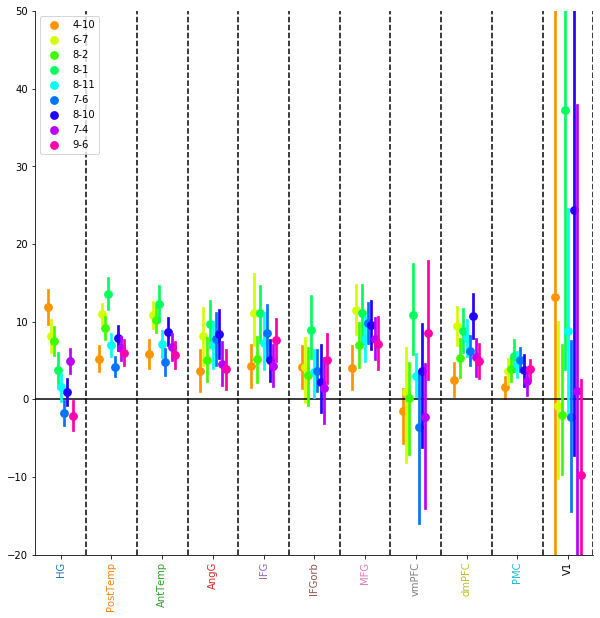

In [97]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']

roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
reps=[]
#for head in brain_heads:
#    reps.append(results[:,:,head])
for head in bert_heads:
    reps.append(results[:,:,head])
#rep_names=brain_head_labels+bert_head_labels
rep_names=bert_head_labels
roi=[]
performance=[]
rep_name=[]
for k in range(len(rep_names)):
    example_layer=reps[k]
    for i in range(example_layer.shape[0]):
        for j in range(20):
            roi.append(rois[j%11])
            rep_name.append(rep_names[k])
            r=example_layer[i,j]
            if r<-800:
                r=0
            performance.append(r)
roi=np.asarray(roi)
performance=np.asarray(performance)
rep_name=np.asarray(rep_name)
df=pd.DataFrame(dict(performance=performance,roi=roi,rep=rep_name))
plt.figure(figsize=(10,10))
#pal=sns.mpl_palette('tab10',n_colors=10)
pal2=sns.mpl_palette('hsv',n_colors=len(rep_names))
#pal2_cols=['#454444','#000000','#FFA500','#0000ff','#ff0000','#ff9999']


#v=sns.violinplot(data=df,x='roi',y='performance',zorder=0,inner=None,linewidth=1,cut=0,hue='roi',alpha=0.2)
#sns.stripplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,zorder=1,size=2,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
#'IFGorb','MFG','vmPFC','dmPFC','PMC'],alpha=0.1,hue_order=rep_names)
sns.pointplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,join=False,ci=95,n_boot=10000,zorder=2,alpha=0.5,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC','V1'],capsize=0,hue_order=rep_names)
#sns.boxplot(x='roi',y='performance',data=df,saturation=0.35,fliersize=0)
plt.xticks(rotation=90)
#plt.legend(['L','R'],['C0','C1'])
plt.axhline(y=0,color='black')
ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:9], labels[:])
sns.despine(top=True,right=True,left=False,bottom=False)
my_colors=['C'+str(i) for i in range(10)]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.xlabel("")
plt.ylabel("")
plt.ylim(-20,50)
for i in range(11):
    plt.axvline(x=i+0.5,color='black',linestyle='--')
plt.savefig('/jukebox/griffiths/bert-brains/code/bert-brains/plots/fig5/bert_heads_roi_performance.svg',format='svg')

In [31]:
for i in range(22):
    full_p=np.median(z_performance[:,i])
    x=np.median(results[:,9,:],axis=0)
    locs=np.where(x>full_p) 
    print(i,locs) 

0 (array([], dtype=int64),)
1 (array([], dtype=int64),)
2 (array([13, 24, 33]),)
3 (array([], dtype=int64),)
4 (array([10, 13, 24, 33, 80]),)
5 (array([13, 24, 33]),)
6 (array([ 10,  13,  24,  33,  71,  80, 109, 136]),)
7 (array([13, 24, 33]),)
8 (array([ 10,  13,  24,  33,  71,  80, 136]),)
9 (array([10, 13, 24, 33]),)
10 (array([ 10,  13,  16,  18,  23,  24,  25,  30,  31,  33,  36,  37,  39,
        40,  41,  45,  51,  56,  57,  59,  64,  65,  66,  67,  68,  69,
        70,  71,  74,  78,  80,  81,  85,  89,  95,  98, 105, 106, 107,
       109, 111, 112, 115, 126, 130, 134, 136, 140]),)
11 (array([], dtype=int64),)
12 (array([], dtype=int64),)
13 (array([10, 13, 24, 33, 80]),)
14 (array([ 10,  13,  24,  33,  45,  71,  80, 109, 130, 136]),)
15 (array([ 10,  13,  24,  33,  45,  71,  80, 109, 130, 136]),)
16 (array([], dtype=int64),)
17 (array([ 10,  13,  24,  33,  71,  80, 109, 136]),)
18 (array([13, 24, 33]),)
19 (array([ 10,  13,  24,  33,  45,  71,  80, 109, 136]),)
20 (array([ 10,

In [57]:
data_dir='/jukebox/griffiths/bert-brains/black_data/'
sub='sub-314'
raw_attention_features=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses/black_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy',allow_pickle=True)
def get_rep(layer_dir):
    nii=nib.load(data_dir+sub+".nii.gz")
    data_prefix='/jukebox/griffiths/bert-brains/code/bert-brains/data/black/'
    phoneme_counts=np.load(data_prefix+"black_phoneme_counts.npy").reshape((-1,1))
    word_counts=np.load(data_prefix+"black_word_counts.npy").reshape((-1,1))
    phoneme_vectors=np.load(data_prefix+"black_phoneme_vectors.npy")
    #embedding_layer=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_12_activations.npy')
    primary_features=np.hstack([phoneme_counts,phoneme_vectors,word_counts])

    load_features=np.load(layer_dir,allow_pickle=True)
    raw_features=[]
    raw_primary_features=[]
    for i in range(load_features.shape[0]):
        if raw_attention_features[i] is not None and len(raw_attention_features[i])>0:
            raw_primary_features.append(primary_features[i])
            if 'semantic_composition' in layer_dir:
                raw_features.append(load_features[i][0])
            else:
                raw_features.append(load_features[i])

    raw_features=np.vstack(raw_features)
    raw_primary_features=np.vstack(raw_primary_features)
    begin_delay=534-raw_features.shape[0]


    print(raw_features.shape)
    num_primary=raw_primary_features.shape[1]

    shifted=[]
    features=raw_features 

    load_data=nii.get_fdata()[:,:,:,8:-8]
    raw_data=load_data[:,:,:,begin_delay:]


    features=features[10:-10,:]
    print(features.shape)
    raw_data=raw_data[:,:,:,10:-10]



    trailing=features.shape[0]-raw_data.shape[3]
    if trailing>0:
        features=features[:-trailing]
    return features 


In [58]:
z_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/full_z_representations.npy')

(495, 9216)
(475, 9216)


In [59]:
all_reps=[]
all_names=brain_head_labels+bert_head_labels
for head in brain_heads:
    all_reps.append(z_rep[:,64*head:64*head+64])
for head in bert_heads:
    all_reps.append(z_rep[:,64*head:64*head+64])

In [69]:
corrs=[]
from scipy.stats import zscore 
for i in range(len(all_reps)):
    rep=zscore(all_reps[i],axis=0)
    rep[np.isnan(rep)]=0.0
    name=all_names[i]
    rdm=np.corrcoef(rep)
    rdm[np.isnan(rdm)]=0.0
    rdm=1.0-rdm 
    corrs.append(rdm)

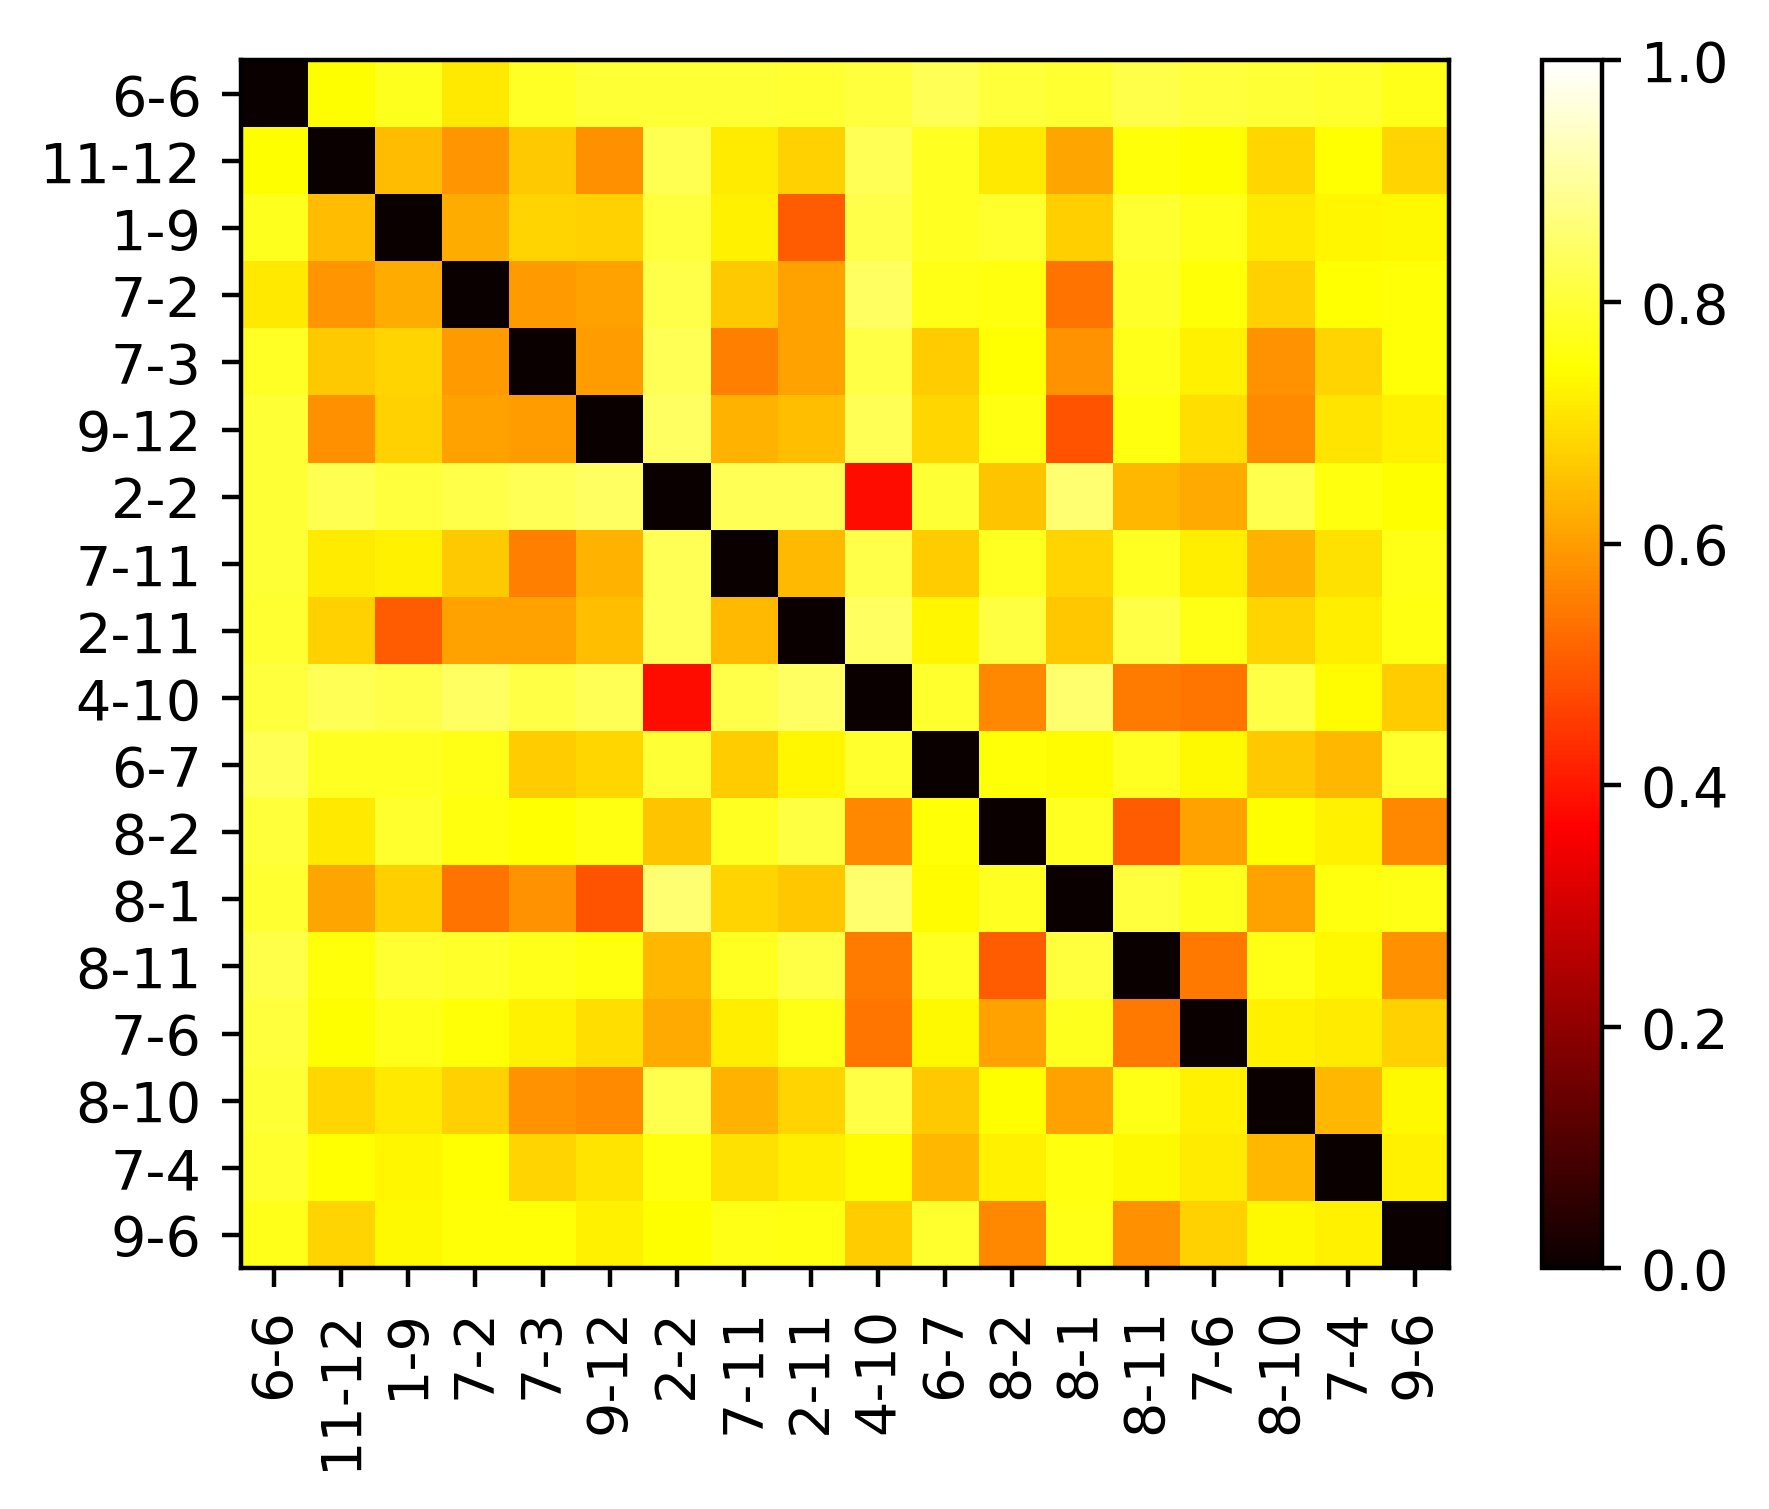

In [70]:
all_corrs=corrs 
all_corrs=[]
for rdm in corrs:
    all_corrs.append(rdm[np.triu(np.ones(rdm.shape),k=0).astype('bool')]) 

all_corrs=np.asarray(all_corrs)
all_corrs[np.isnan(all_corrs)]=0.0
plt.figure(dpi=400)
plt.imshow(1-np.corrcoef(all_corrs),vmin=0,vmax=1,cmap='hot')
plt.xticks(list(range(len(all_names))),all_names,rotation=90)
plt.yticks(list(range(len(all_names))),all_names)
plt.colorbar()
distance_mat=1-np.corrcoef(all_corrs)
plt.savefig('/jukebox/griffiths/bert-brains/code/bert-brains/plots/fig5/rsa_all_heads.svg',format='svg')

In [114]:
len(bert_head_labels)

9

In [52]:
decoding_black=np.load('data/decoding_results_indiv_bert-base-uncased_black_logistic_3.npy.npz')
decoding_slumlord=np.load('data/decoding_results_indiv_bert-base-uncased_slumlordreach_logistic_3.npy.npz')

dependencies=['prep','pobj','det','nsubj','amod','dobj','advmod','aux','poss','ccomp','mark','prt']

accuracy=[]
dependency=[]
head=[]

for d in dependencies:
    idx=int(list(decoding_black['labels']).index(d))
    black_acc=decoding_black['acc'][:,:,idx].flatten()
    idx=int(list(decoding_slumlord['labels']).index(d))
    slum_acc=decoding_slumlord['acc'][:,:,idx].flatten()
    mean_acc=np.mean([black_acc,slum_acc],axis=0)
    print(mean_acc.shape)
    for h_idx,h in enumerate(bert_heads):
        accuracy.append(mean_acc[h])
        dependency.append(d)
        head.append(bert_head_labels[h_idx])
df=pd.DataFrame(dict(accuracy=accuracy,dependency=dependency,head=head))

(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)
(144,)


In [53]:
df

,accuracy,dependency,head
0,0.825264,prep,4-10
1,0.786133,prep,6-7
2,0.781388,prep,8-2
3,0.724861,prep,8-1
4,0.770756,prep,8-11
...,...,...,...
103,0.969140,prt,8-11
104,0.969557,prt,7-6
105,0.969141,prt,8-10
106,0.969142,prt,7-4


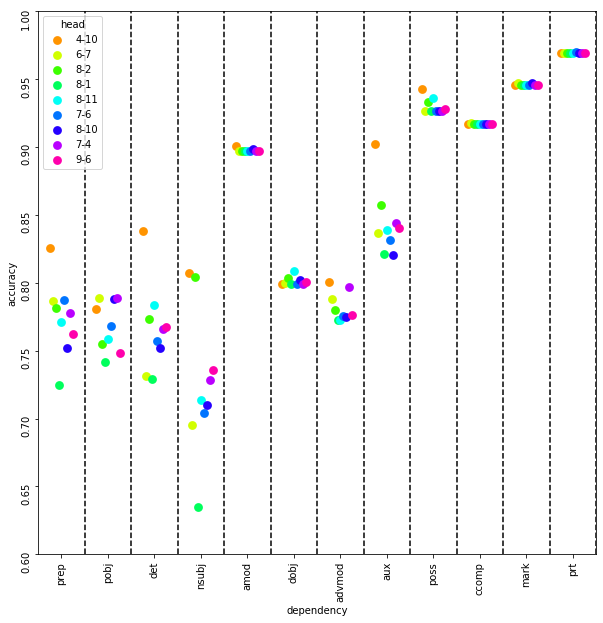

In [55]:
pal2=sns.mpl_palette('hsv',n_colors=len(brain_head_labels))
#pal2_cols=['#454444','#000000','#FFA500','#0000ff','#ff0000','#ff9999']


#v=sns.violinplot(data=df,x='roi',y='performance',zorder=0,inner=None,linewidth=1,cut=0,hue='roi',alpha=0.2)
#sns.stripplot(data=df.sort_values('performance'),x='roi',y='performance',hue='rep',dodge=0.5,zorder=1,size=2,palette=pal2,order=['HG','PostTemp','AntTemp','AngG','IFG',
#'IFGorb','MFG','vmPFC','dmPFC','PMC'],alpha=0.1,hue_order=rep_names)
plt.figure(figsize=(10,10))
sns.pointplot(data=df,x='dependency',y='accuracy',hue='head',dodge=0.5,join=False,zorder=2,alpha=0.5,palette=pal2,capsize=0,hue_order=bert_head_labels)
plt.ylim(0.6,1.0)
for i in range(len(dependencies)):
    plt.axvline(x=i+0.5,color='black',linestyle='--')
plt.yticks([0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0],rotation=90)
plt.xticks(list(range(len(dependencies))),dependencies,rotation=90)
plt.savefig('plots/fig5/bert_dep_acc.svg',format='svg')

In [43]:
5/.4

12.5

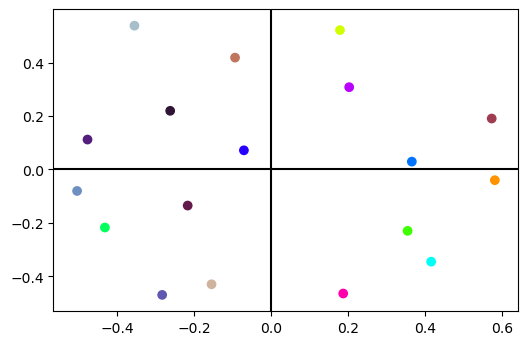

In [79]:
all_colors=list(sns.mpl_palette('twilight',n_colors=len(brain_head_labels)))+list(sns.mpl_palette('hsv',n_colors=len(brain_head_labels)))
from sklearn.manifold import MDS 
mds=MDS(n_components=2,dissimilarity='precomputed')
coords=mds.fit_transform(distance_mat)
plt.figure(dpi=100)
plt.scatter(coords[:,0],coords[:,1],c=all_colors)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.savefig('plots/fig5/mds_heads.svg',format='svg')

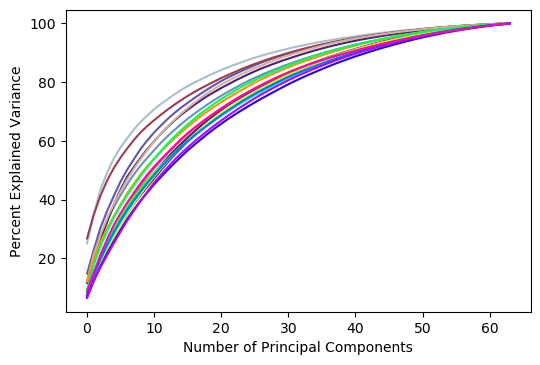

In [85]:
from sklearn.decomposition import PCA 
plt.figure(dpi=100)
for k in range(len(all_reps)):
    rep=all_reps[k]
    name=all_names[k]
    pca=PCA(n_components=64)
    pca.fit(rep)
    explained_variance=pca.explained_variance_ratio_*100
    line=np.zeros((64,))
    line[:len(explained_variance)]=np.cumsum(explained_variance)
    line[len(explained_variance)-1:]=line[len(explained_variance)-1]
    plt.plot(list(range(64)),line,color=all_colors[k])
plt.xlabel("Number of Principal Components")
plt.ylabel("Percent Explained Variance")
plt.savefig('plots/fig5/pca_heads.svg',format='svg')
